根据入学考试的两门成绩，构建一个分类器，预测学生是否能入学

In [1]:
#数据分析三大件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号

In [2]:
pdData = pd.read_csv('LogiReg_data.csv', header=None, names=['Exam 1', 'Exam 2', 'Admitted']) 
#header设置第一行内容是否为列名,names设置列名。
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, '科目2分数')

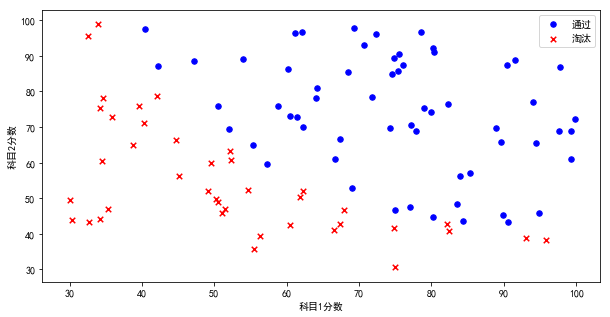

In [3]:
positive = pdData[pdData['Admitted'] == 1] 
negative = pdData[pdData['Admitted'] == 0] 

fig = plt.figure(figsize=(10,5))
plt.scatter(positive['Exam 1'], positive['Exam 2'], s=30, c='b', marker='o', label='通过') 
#s设置点的大小，c设置颜色，marker设置点的形状，label设置图例
plt.scatter(negative['Exam 1'], negative['Exam 2'], s=30, c='r', marker='x', label='淘汰')
plt.legend()#显示图例
plt.xlabel('科目1分数')#设置横坐标标题
plt.ylabel('科目2分数')

目标：建立分类器（求解出三个参数  $\theta_0         \theta_1         \theta_2 $）


设定阈值，根据阈值判断录取结果

### 要完成的模块
-  `sigmoid` : 映射到概率的函数

-  `model` : 返回预测结果值

-  `cost` : 根据参数计算损失

-  `gradient` : 计算每个参数的梯度方向

-  `descent` : 进行参数更新

-  `accuracy`: 计算精度

In [4]:
pdData.insert(0, 'Ones', 1) #insert插入一列，insert(0, 'Ones', 1),0是索引，'列名'，1是插入的值

In [5]:
pdData.head()

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [6]:
orig_data = pdData.values
orig_data[:5]

array([[ 1.        , 34.62365962, 78.02469282,  0.        ],
       [ 1.        , 30.28671077, 43.89499752,  0.        ],
       [ 1.        , 35.84740877, 72.90219803,  0.        ],
       [ 1.        , 60.18259939, 86.3085521 ,  1.        ],
       [ 1.        , 79.03273605, 75.34437644,  1.        ]])

In [7]:
np.random.seed(10)#设置随机种子

In [8]:
print(orig_data.shape)
X = orig_data[:,0:3] #X取指标下的数据
y = orig_data[:,3:]
theta = 0.01*np.random.random([1, 3])
X.shape,y.shape,theta.shape

(100, 4)


((100, 3), (100, 1), (1, 3))

###  `sigmoid` 函数

<img src="sigmoid函数.png" style="width:250px;height:100px;float:left">

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## 预测函数`h(x)`
<img src="hx.png" style="width:400px;height:130px;float:left">

In [10]:
def h(X, theta): #这个就是h(x) 
    return sigmoid(np.dot(X, theta.T))

In [11]:
#h(X, theta)

## 损失函数
<img src="loss.png" style="width:550px;height:75px;float:left">

In [12]:
def cost(X, y, theta):
    left = np.multiply(y, np.log(h(X, theta))) #np.multiply相当于*乘，区别于np.dot矩阵乘法
    right = np.multiply(1 - y, np.log(1 - h(X, theta))) 
    return -np.sum(left + right) / (len(X))  #返回平均损失J(θ)

In [13]:
cost(X, y, theta)

0.6442591075374959

## 计算梯度
<img src="计算梯度.png" style="width:300px;height:75px;float:left">

In [14]:
def grad(X, y, theta):
    gradient = -((y - h(X, theta))*X).mean(axis = 0)
    return gradient

In [15]:
grad(X, y, theta)

array([ 0.0081304 , -4.90533704, -3.58791452])

In [16]:
def shuffleData(data):
    np.random.shuffle(data)  #shuffle对数据进行洗牌操作
    cols = data.shape[1]
    X = data[:, 0:cols-1]
    y = data[:, cols-1:]
    return X, y  #洗牌之后重新取新的X,Y

In [17]:
k=0
batchSize = 100
grad(X[k:k+batchSize], y[k:k+batchSize], theta)

array([ 0.0081304 , -4.90533704, -3.58791452])

In [18]:
import time
def descent(data, theta, batchSize, iteration, alpha):
    init_time = time.time()#返回当前时间的时间戳,获取当前的时间
    theta = 0.01*np.random.random([1, 3])
    i = 0 # 迭代次数
    k = 0 # batch
    X, y = shuffleData(data)
    #grad = np.zeros(theta.shape) # 计算的梯度
    costs = [cost(X, y, theta)] # 损失值
    
    for i in range(iteration):
        gradient = grad(X[k:k+batchSize], y[k:k+batchSize], theta)
        k += batchSize #取batch数量个数据
        if k >= 100: 
            k = 0 
            X, y = shuffleData(data) #重新洗牌
        theta = theta - alpha*gradient # 参数更新，alpha*grad是学习率乘以梯度
        costs.append(cost(X, y, theta)) # 计算新的损失，记录每一次损失
        if (i%10000) == 0 :
            print('第%d次迭代，当前损失:'%i,cost(X, y, theta))
    return theta, costs, grad, time.time() - init_time

### 原始数据
#### 批量梯度下降

第0次迭代，当前损失: 0.6373227916768868
第10000次迭代，当前损失: 0.5854609852349348
第20000次迭代，当前损失: 0.547661106635239
第30000次迭代，当前损失: 0.5157116668159502
第40000次迭代，当前损失: 0.4885598972068903
第50000次迭代，当前损失: 0.46533141950690754
第60000次迭代，当前损失: 0.4453150393327089
第70000次迭代，当前损失: 0.4279387299126279
第80000次迭代，当前损失: 0.41274446984064517
第90000次迭代，当前损失: 0.3993655307071172
theta: [[-4.80823992  0.04525378  0.03816348]]
耗时：14.84s


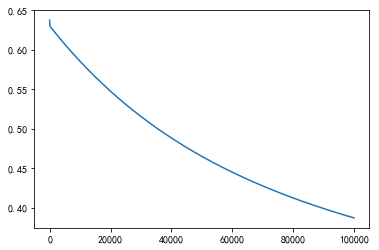

In [19]:
theta, costs, grad, time_cost = descent(orig_data, theta, 100, 100000, 0.001)
print('theta:',theta)
print('耗时：%03.2fs'%time_cost)
plt.plot(range(len(costs)),costs)

#### 随机梯度下降

第0次迭代，当前损失: 2.6147936708116952
第10000次迭代，当前损失: 2.1874014184481356
第20000次迭代，当前损失: 1.176722957211229
第30000次迭代，当前损失: 1.591480152221763
第40000次迭代，当前损失: 1.0596427877320864
第50000次迭代，当前损失: 1.7993355792853578
第60000次迭代，当前损失: 0.9440680897457066
第70000次迭代，当前损失: 1.2695484159250359
第80000次迭代，当前损失: 0.548914136439863
第90000次迭代，当前损失: 0.5592645779992649
theta: [[-6.75063756e+00  5.19797291e-02 -6.34928975e-03]]
耗时：4.36s


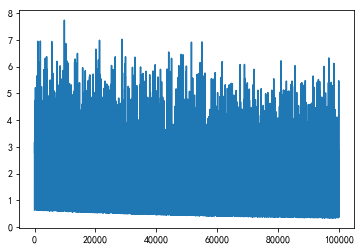

In [20]:
theta, costs, grad, time_cost = descent(orig_data, theta, 1, 100000, 0.001)
print('theta:',theta)
print('耗时：%03.2fs'%time_cost)
plt.plot(range(len(costs)),costs)

#### 小批量梯度下降

第0次迭代，当前损失: 0.6480838698503452
第10000次迭代，当前损失: 0.6613141504418573
第20000次迭代，当前损失: 0.5458566152027463
第30000次迭代，当前损失: 0.529961033564903
第40000次迭代，当前损失: 0.488911495639677
第50000次迭代，当前损失: 0.5546838399425553
第60000次迭代，当前损失: 0.4539142995912468
第70000次迭代，当前损失: 0.4251349346910438
第80000次迭代，当前损失: 0.4217400822206252
第90000次迭代，当前损失: 0.4198481693252844
theta: [[-4.93394276  0.04729985  0.04077288]]
耗时：10.31s


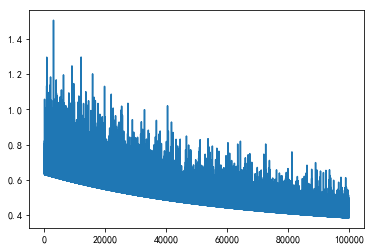

In [21]:
theta, costs, grad, time_cost = descent(orig_data, theta, 64, 100000, 0.001)
print('theta:',theta)
print('耗时：%03.2fs'%time_cost)
plt.plot(range(len(costs)),costs)

#### 标准化数据

In [22]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x_std = std_scaler.fit_transform(X)
std_data = np.hstack((x_std,y))

#### 批量梯度下降

第0次迭代，当前损失: 0.6914873564555161
第10000次迭代，当前损失: 0.3431715230980382
第20000次迭代，当前损失: 0.3055948937332997
第30000次迭代，当前损失: 0.2930095865119282
第40000次迭代，当前损失: 0.28726919410837665
第50000次迭代，当前损失: 0.284239252713627
第60000次迭代，当前损失: 0.2824982343133634
第70000次迭代，当前损失: 0.2814411846443276
第80000次迭代，当前损失: 0.2807743825632383
第90000次迭代，当前损失: 0.28034189581502034
theta: [[1.79974155e-03 2.62050488e+00 2.32763798e+00]]
耗时：14.64s


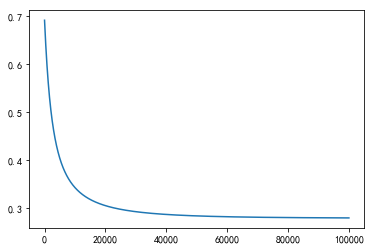

In [23]:
theta, costs, grad, time_cost = descent(std_data, theta, 100, 100000, 0.001)
print('theta:',theta)
print('耗时：%03.2fs'%time_cost)
plt.plot(range(len(costs)),costs)

#### 随机梯度下降

第0次迭代，当前损失: 0.6897056491346477
第10000次迭代，当前损失: 0.3430699672956139
第20000次迭代，当前损失: 0.3055662627248557
第30000次迭代，当前损失: 0.29299645909469224
第40000次迭代，当前损失: 0.28726289212093303
第50000次迭代，当前损失: 0.28423510762568505
第60000次迭代，当前损失: 0.2824978411131996
第70000次迭代，当前损失: 0.28143939450487837
第80000次迭代，当前损失: 0.28077327876296737
第90000次迭代，当前损失: 0.2803409967917529
theta: [[1.22575407e-03 2.62056445e+00 2.32774180e+00]]
耗时：4.38s


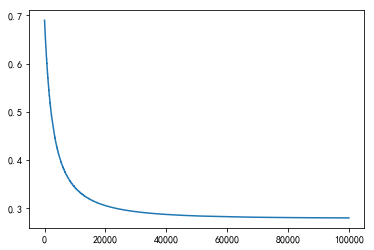

In [24]:
theta, costs, grad, time_cost = descent(std_data, theta, 1, 100000, 0.001)
print('theta:',theta)
print('耗时：%03.2fs'%time_cost)
plt.plot(range(len(costs)),costs)

#### 小批量梯度下降

第0次迭代，当前损失: 0.6892250380678536
第10000次迭代，当前损失: 0.3430463035789857
第20000次迭代，当前损失: 0.30555738567654533
第30000次迭代，当前损失: 0.29299801505901046
第40000次迭代，当前损失: 0.2872755836516928
第50000次迭代，当前损失: 0.28424512348186565
第60000次迭代，当前损失: 0.28249761953825986
第70000次迭代，当前损失: 0.28144529675280916
第80000次迭代，当前损失: 0.2807758482406047
第90000次迭代，当前损失: 0.28034381362410427
theta: [[0.00333922 2.62041989 2.327114  ]]
耗时：9.61s


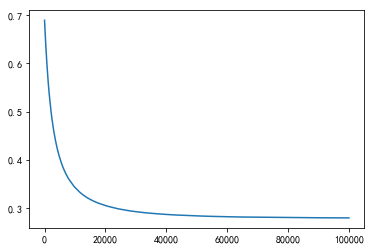

In [25]:
theta, costs, grad, time_cost = descent(std_data, theta, 64, 100000, 0.001)
print('theta:',theta)
print('耗时：%03.2fs'%time_cost)
plt.plot(range(len(costs)),costs)

In [26]:
predict = 1*(h(x_std,theta)>0.5)#预测类别

In [27]:
(y == predict).sum()#预测正确的总样本数

87

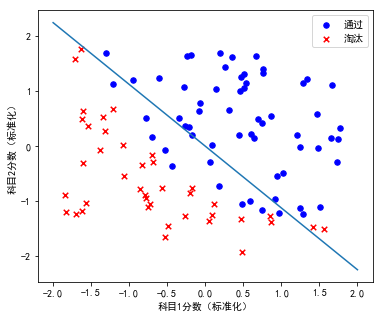

In [28]:
X = std_data[:,1:]
positive = X[X[:,2] == 1,:] 
negative = X[X[:,2] == 0,:]

fig = plt.figure(figsize=(6,5))
plt.scatter(positive[:,0], positive[:,1], s=30, c='b', marker='o', label='通过') 
#s设置点的大小，c设置颜色，marker设置点的形状，label设置图例
plt.scatter(negative[:,0], negative[:,1], s=30, c='r', marker='x', label='淘汰')
plt.legend()#显示图例
plt.xlabel('科目1分数（标准化）')#设置横坐标标题
plt.ylabel('科目2分数（标准化）')

#画出决策边界
x1 = np.arange(-2,2.5)
x2 = (-theta[0,1]/theta[0,2])*x1-(theta[0,0]/theta[0,2])
plt.plot(x1,x2)